In [ ]:
import pickle as pk
with open("3dmeshes/Eros.pk", "rb") as f:
    vertices, triangles = pk.load(f)
vertices

In [ ]:
triangles

In [9]:
import numpy as np
import polyhedral_gravity as gravity_model
import mesh_plotting
import mesh_utility
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib import cm

In [10]:
# meshing
import pyvista as pv
import tetgen as tg
import meshio as mio
import openmesh as om

In [11]:
vertices, faces = mesh_utility.read_pk_file("3dmeshes/churyumov-gerasimenko.pk")
vertices_lp, faces_lp = mesh_utility.read_pk_file("3dmeshes/churyumov-gerasimenko.pk")
vertices, faces = np.array(vertices), np.array(faces)
DENSITY = 1.0
VALUES = np.arange(-2, 2.01, 0.01)

In [12]:
#print(vertices_lp)
#vertices_lp.shape
faces = np.hstack(faces)

# Plot-function will crash kernel
#mesh = pv.PolyData(vertices, faces)
#mesh.plot(show_edges=True)



In [17]:
def plot_triangulations(vertices, faces, title, filename):
    """Plots the triangulation of mesh

    Args:
        vertices: (N, 3)-array-like of the vertices
        faces: (M, 3)-array-like of the triangular faces
        title (str): of the plot
        filename (str): the path/ filename

    Returns:
        None

    """
    print("Plotting Triangulation")
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(5, 5))
    ax.plot_trisurf(vertices[:, 0],
                    vertices[:, 1],
                    vertices[:, 2],
                    triangles=faces,
                    edgecolor=[[0, 0, 0]],
                    linewidth=1.0,
                    alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$z$")

    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)


    x =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    y =[0.5,0.6,0.2,0.3,0.13,0.4,0.1,0.2,0.4]
    z =[0.2,0.3,0.3,0.3,0.5,0.7,0.9,0.11,0.9]
    ax.scatter(x, y, z, c='r', marker='o')

    d = 1
    theta = np.linspace(0, 2 * np.pi, 201)
    y = d*np.cos(theta)
    z = d*np.sin(theta)

    for i in range(1):
        phi = i*np.pi    
        ax.plot(y*np.sin(phi)+d*np.sin(phi),
                y*np.cos(phi)+d*np.cos(phi), z)



    fig.savefig(filename, dpi=300)

Plotting Triangulation


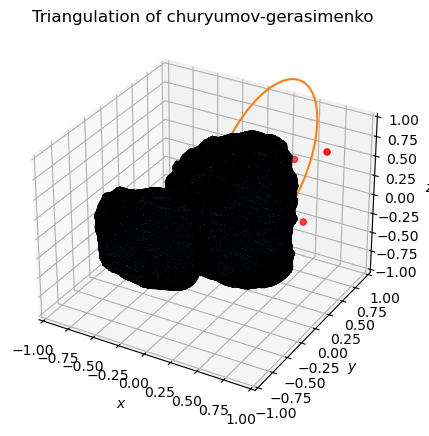

In [18]:
########################################################################################################################
# Triangulation
########################################################################################################################
plot_triangulations(vertices_lp, faces_lp, "Triangulation of churyumov-gerasimenko",
                                 "figures/67P/test___churyumov-gerasimenko_triangulation.png")

Plotting Triangulation


'\ncomputation_points = np.array(np.meshgrid([0], VALUES, VALUES)).T.reshape(-1, 3)\ngravity_results = gravity_model.evaluate(vertices, faces, DENSITY, computation_points)\n\npotentials = -1 * np.array([i[0] for i in gravity_results])\npotentials = potentials.reshape((len(VALUES), len(VALUES)))\n\nX = computation_points[:, 1].reshape(len(VALUES), -1)\nZ = computation_points[:, 2].reshape(len(VALUES), -1)\n\nmesh_plotting.plot_grid_2d(Y, Z, potentials,\n                           "Potential of churyumov-gerasimenko YZ-Plane ($x=0$)", "figures/67P/churyumov-gerasimenko_potential_2d_yz.png",\n                           labels=(\'$y$\', \'$z$\'), vertices=vertices, coordinate=0)\nmesh_plotting.plot_grid_3d(Y, Z, potentials,\n                           "Potential of churyumov-gerasimenko YZ-Plane ($x=0$)", "figures/67P/churyumov-gerasimenko_potential_3d_yz.png",\n                           labels=(\'$y$\', \'$z$\'))\n\n# We just want a slice of x, y values for z = 0\naccelerations = np.arra

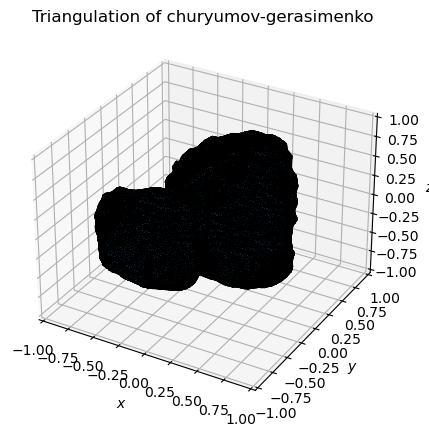

In [6]:
import numpy as np
import polyhedral_gravity as gravity_model
import mesh_plotting
import mesh_utility


vertices, faces = mesh_utility.read_pk_file("3dmeshes/churyumov-gerasimenko.pk")
vertices_lp, faces_lp = mesh_utility.read_pk_file("3dmeshes/churyumov-gerasimenko.pk")
vertices, faces = np.array(vertices), np.array(faces)
DENSITY = 1.0
VALUES = np.arange(-2, 2.01, 0.01)

########################################################################################################################
# Triangulation
########################################################################################################################
mesh_plotting.plot_triangulation(vertices_lp, faces_lp, "Triangulation of churyumov-gerasimenko",
                                 "figures/67P/churyumov-gerasimenko_triangulation.png")

########################################################################################################################
# Plot of the potential and Acceleration in XY Plane (Z = 0)
########################################################################################################################
"""
computation_points = np.array(np.meshgrid(VALUES, VALUES, [0])).T.reshape(-1, 3)
gravity_results = gravity_model.evaluate(vertices, faces, DENSITY, computation_points)

potentials = -1 * np.array([i[0] for i in gravity_results])
potentials = potentials.reshape((len(VALUES), len(VALUES)))

X = computation_points[:, 0].reshape(len(VALUES), -1)
Y = computation_points[:, 1].reshape(len(VALUES), -1)

mesh_plotting.plot_grid_2d(X, Y, potentials, "Potential of churyumov-gerasimenko XY-Plane ($z=0$)",
                           "figures/67P/churyumov-gerasimenko_potential_2d_xy.png", vertices=vertices, coordinate=2)
mesh_plotting.plot_grid_3d(X, Y, potentials, "Potential of churyumov-gerasimenko XY-Plane ($z=0$)",
                           "figures/67P/churyumov-gerasimenko_potential_3d_xy.png")

# We just want a slice of x, y values for z = 0
accelerations = np.array([i[1][:] for i in gravity_results])
acc_xy = np.delete(accelerations, 2, 1)
acc_xy = -1 * acc_xy

mesh_plotting.plot_quiver(X, Y, acc_xy, "Acceleration in $x$ and $y$ direction for $z=0$",
                          "figures/67P/churyumov-gerasimenko_field_xy.png", vertices=vertices, coordinate=2)
"""

########################################################################################################################
# Plot of the potential and Acceleration in XZ Plane (Y = 0)
########################################################################################################################
"""
computation_points = np.array(np.meshgrid(VALUES, [0], VALUES)).T.reshape(-1, 3)
gravity_results = gravity_model.evaluate(vertices, faces, DENSITY, computation_points)

potentials = -1 * np.array([i[0] for i in gravity_results])
potentials = potentials.reshape((len(VALUES), len(VALUES)))

X = computation_points[:, 0].reshape(len(VALUES), -1)
Z = computation_points[:, 2].reshape(len(VALUES), -1)

mesh_plotting.plot_grid_2d(X, Z, potentials,
                           "Potential of churyumov-gerasimenko XZ-Plane ($y=0$)", "figures/67P/churyumov-gerasimenko_potential_2d_xz.png",
                           labels=('$x$', '$z$'), vertices=vertices, coordinate=1)
mesh_plotting.plot_grid_3d(X, Z, potentials,
                           "Potential of churyumov-gerasimenko XZ-Plane ($y=0$)", "figures/67P/churyumov-gerasimenko_potential_3d_xz.png",
                           labels=('$x$', '$z$'))

# We just want a slice of x, y values for z = 0
accelerations = np.array([i[1][:] for i in gravity_results])
acc_xy = np.delete(accelerations, 1, 1)
acc_xy = -1 * acc_xy

mesh_plotting.plot_quiver(X, Z, acc_xy, "Acceleration in $x$ and $z$ direction for $y=0$",
                          "figures/67P/churyumov-gerasimenko_field_xz.png", labels=('$x$', '$z$'),
                          vertices=vertices, coordinate=1)
"""

########################################################################################################################
# Plot of the potential and Acceleration in YZ Plane (X = 0)
########################################################################################################################
"""
computation_points = np.array(np.meshgrid([0], VALUES, VALUES)).T.reshape(-1, 3)
gravity_results = gravity_model.evaluate(vertices, faces, DENSITY, computation_points)

potentials = -1 * np.array([i[0] for i in gravity_results])
potentials = potentials.reshape((len(VALUES), len(VALUES)))

X = computation_points[:, 1].reshape(len(VALUES), -1)
Z = computation_points[:, 2].reshape(len(VALUES), -1)

mesh_plotting.plot_grid_2d(Y, Z, potentials,
                           "Potential of churyumov-gerasimenko YZ-Plane ($x=0$)", "figures/67P/churyumov-gerasimenko_potential_2d_yz.png",
                           labels=('$y$', '$z$'), vertices=vertices, coordinate=0)
mesh_plotting.plot_grid_3d(Y, Z, potentials,
                           "Potential of churyumov-gerasimenko YZ-Plane ($x=0$)", "figures/67P/churyumov-gerasimenko_potential_3d_yz.png",
                           labels=('$y$', '$z$'))

# We just want a slice of x, y values for z = 0
accelerations = np.array([i[1][:] for i in gravity_results])
acc_xy = np.delete(accelerations, 0, 1)
acc_xy = -1 * acc_xy

mesh_plotting.plot_quiver(Y, Z, acc_xy, "Acceleration in $y$ and $z$ direction for $x=0$",
                          "figures/67P/churyumov-gerasimenko_field_yz.png", labels=('$y$', '$z$'),
                          vertices=vertices, coordinate=0)

"""


In [1]:
#Other stuff
import polyhedral_gravity as gravity_model
import mesh_plotting
import mesh_utility
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib import cm

# core stuff
import pickle as pk
import numpy as np

# meshing
import pyvista
import tetgen
import meshio as mio
import openmesh as om

"""
General info:
This script contains methods to transform/ convert between different kinds of mesh files.
"""


def read_pk_file(filename):
    """
    Reads in a .pk file and returns the vertices and triangles (faces)
    Args:
        filename (str): The filename of the .pk file

    Returns:
        mesh_points, mesh_triangles (tuple): list of mesh points and list of mesh triangles

    Notes:
        Adapted from
        https://github.com/darioizzo/geodesyNets/blob/master/archive/Modelling%20Bennu%20with%20mascons.ipynb

    """
    with open(filename, "rb") as f:
        mesh_points, mesh_triangles = pk.load(f)
    mesh_points = np.array(mesh_points)
    mesh_triangles = np.array(mesh_triangles)

    # Characteristic dimension
    L = max(mesh_points[:, 0]) - min(mesh_points[:, 0])

    # Non dimensional units
    mesh_points = mesh_points / L * 2 * 0.8
    return mesh_points, mesh_triangles


def write_to_node_faces_ele_file(path, filename, nodes, faces, ele):
    """
    Write to a .node, .face and .ele file.
    Args:
        path (str): the path where to write
        filename (str): the filename of the file to create
        nodes (list): list of vertices (cartesian coordinates)
        faces (list): list of faces (triangles consisting of vertices' indices)
        ele (list): list of polyhedral elements

    Returns:
        None

    """
    with open(path + filename + ".node", "w") as f:
        f.write("# Node count, 3 dimensions, no attribute, no boundary marker\n")
        f.write("{} {} {} {}\n".format(int(nodes.size / 3), 3, 0, 0))
        f.write("# Node index, node coordinates\n")
        index = 0
        for n in nodes:
            f.write("{} {} {} {}\n".format(index, n[0], n[1], n[2]))
            index += 1
    with open(path + filename + ".face", "w") as f:
        f.write("# Number of faces, boundary marker off\n")
        f.write("{} {}\n".format(int(faces.size / 3), 0))
        f.write("# Face index, nodes of face\n")
        index = 0
        for fac in faces:
            f.write("{} {} {} {}\n".format(index, fac[0], fac[1], fac[2]))
            index += 1
    with open(path + filename + ".ele", "w") as f:
        f.write("# number of tetrahedra, number of nodes per tet, no region attribute\n")
        f.write("{} {} {}\n".format(int(ele.size / 4), 4, 0))
        f.write("# tetrahedra index, nodes\n")
        index = 0
        for tet in ele:
            f.write("{} {} {} {} {}\n".format(index, tet[0], tet[1], tet[2], tet[3]))
            index += 1


def write__tsoulis_fortran_files(path, nodes, faces):
    """
    Writes to a topout, xyposnew and dataut file - exactly the input file which the
    FORTRAN implementation by Tsoulis requires as input.
    Args:
        path (str):  the path where to write
        nodes (list): list of vertices (cartesian coordinates)
        faces (list): list of faces (triangles consisting of vertices' indices)

    Returns:
        None
    """
    with open(path + "topoaut", "w") as f:
        for fac in faces:
            f.write(" {} {} {}\n".format(fac[0] + 1, fac[1] + 1, fac[2] + 1))
    with open(path + "xyzposnew", "w") as f:
        for n in nodes:
            f.write(" {} {} {}\n".format(n[0], n[1], n[2]))
    with open(path + "dataut", "w") as f:
        for fac in faces:
            f.write(" 3")


def write_other(path, name, nodes, faces):
    """
    Writes other files like .ply files.
    Args:
        path (str):  the path where to write
        name (str): the name of the file to be created, the suffix determines the concrete write operation
        nodes (list): list of vertices (cartesian coordinates)
        faces (list): list of faces (triangles consisting of vertices' indices)

    Returns:
        None
    """
    mesh = om.TriMesh()
    mesh.add_vertices(nodes)
    mesh.add_faces(faces)
    om.write_mesh((path+name), mesh)
    # Alternative Framework - Code
    # cells = [("triangle", faces)]
    # mesh = mio.Mesh(nodes, cells)
    # mesh.write((path + name))


#Note using at the moment:
def main():
    # TODO Pass file names via terminal?
    # Read the input .pk file
    print("Reading file...")
    mesh_points, mesh_triangles = read_pk_file("../mesh/input/Eros.pk")

    # Tetrahralize the mesh
    print("Tetrahralize...")
    tgen = tetgen.TetGen(mesh_points, mesh_triangles)
    nodes, elems = tgen.tetrahedralize()

    # Print a vtk file, diplayable with ParaView
    print("Writing vtk files...")
    tgen.write("../mesh/Eros/Eros.vtk")

    # Print the input files for the C++ implementation of the Polyhedral Model
    print("Writing polyhedron-cpp input files..")
    write_to_node_faces_ele_file("../mesh/Eros/", "Eros", nodes, mesh_triangles, elems)

    # Print the input files for the FORTRAN implementation of the Polyhedral Model by Tsoulis
    print("Writing FORTRAN files..")
    write__tsoulis_fortran_files("../mesh/Eros/", mesh_points, mesh_triangles)

    # Write other files
    print("Writing other files...")
    write_other("../mesh/Eros/", "Eros.ply", nodes, mesh_triangles)

    # Plot the tetrahralized mesh
    # print("Showing Plot")
    # # tgen.grid.plot(show_edges=True)
    # pl = pyvista.Plotter()
    # pl.add_mesh(tgen.grid)
    # # pl.add_axes_at_origin(labels_off=True)
    # pl.show()

    print("Finished.")



Reading file...
[[-0.59051693  0.89708599 -0.08143356]
 [-0.58718115  0.93751764 -0.00871683]
 [-0.59683141  0.90453937 -0.06094437]
 ...
 [ 0.13063921 -1.01777363  0.30933859]
 [ 0.09238016 -0.96809155  0.38999862]
 [ 0.16695523 -0.96728797  0.3039821 ]]
[[-1.84631405  2.80483483 -0.25461069]
 [-1.83588437  2.93124869 -0.02725409]
 [-1.86605694  2.82813863 -0.19054905]
 ...
 [ 0.4084574  -3.18217758  0.96718002]
 [ 0.28883641 -3.02684127  1.2193722 ]
 [ 0.52200331 -3.0243288   0.9504324 ]]
Reading file...
Physical dimension along x (normalized):  5.0025703125 Km
Physical dimension along x (UN-normalized):  5.0025703125 Km
Physical dimension along x (Raw):  1.6 Km
Tetrahralize...
Writing vtk files...
Writing polyhedron-cpp input files..
Writing FORTRAN files..
Writing other files...
Showing Plot


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

[[2.94616814 1.67148616 3.69677355]
 [3.46752436 1.24057584 3.55129824]
 [1.7259319  2.66715157 1.58484069]
 [1.84998918 0.85596639 0.65038536]
 [3.67405395 0.09135785 2.05053039]
 [2.56275084 0.79423898 0.19142473]
 [0.37433901 3.82478896 1.32403323]
 [0.09508708 2.1864699  1.23989349]
 [3.37131791 3.69539071 2.0213787 ]
 [0.03180463 0.70858858 2.241708  ]]


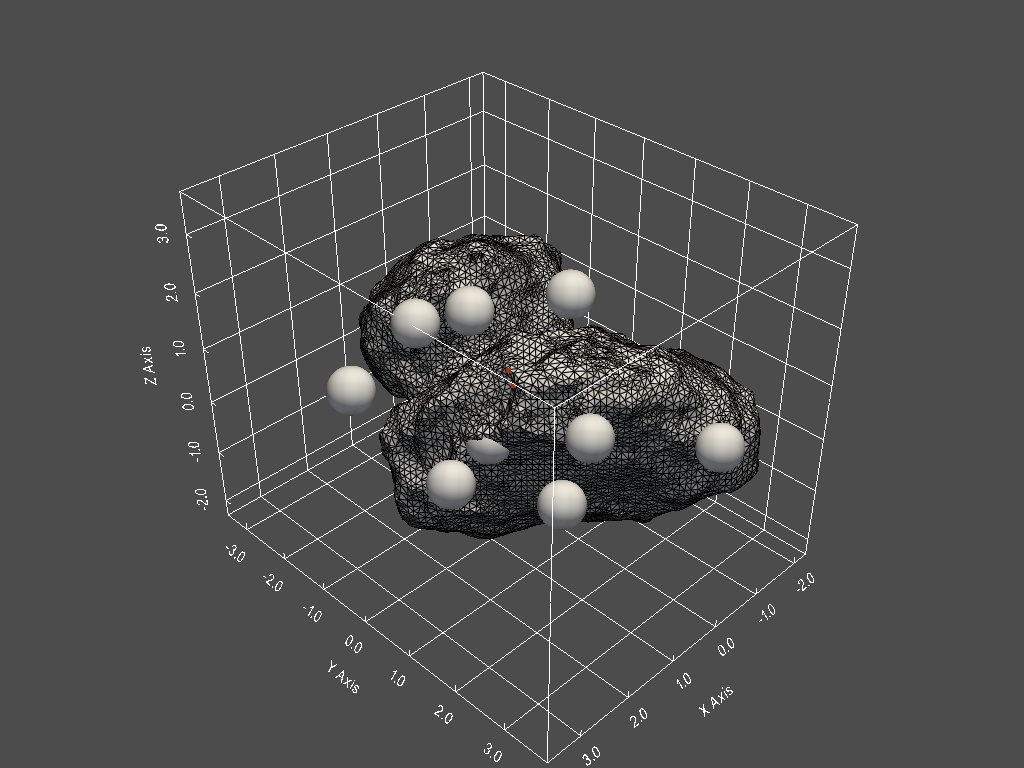

Finished.


In [13]:

# Read the input .pk file
print("Reading file...")
mesh_points, mesh_triangles = read_pk_file("3dmeshes/churyumov-gerasimenko.pk")
print(mesh_points)

# Unormalizing
#   Conversion factor [to metric meters]: 3126.6064453124995
mesh_points = mesh_points*float(3126.6064453124995)/1000
print(mesh_points)

# Reading raw
print("Reading file...")
mesh_points_raw, mesh_triangles_raw = read_pk_file("3dmeshes/churyumov-gerasimenko_raw.pk")



print("Physical dimension along x (normalized): ", max(mesh_points[:,0]) - min(mesh_points[:,0]), "Km")
print("Physical dimension along x (UN-normalized): ", max(mesh_points[:,0]) - min(mesh_points[:,0]), "Km")
print("Physical dimension along x (Raw): ", max(mesh_points_raw[:,0]) - min(mesh_points_raw[:,0]), "Km")


# Simple rotatation of comet in plot
#mesh_points = mesh_points*-1

# Tetrahralize the mesh
print("Tetrahralize...")
tgen = tetgen.TetGen(mesh_points, mesh_triangles)
nodes, elems = tgen.tetrahedralize()

# Print a vtk file, diplayable with ParaView
print("Writing vtk files...")
tgen.write("mesh/67P/churyumov-gerasimenko.vtk")

# Print the input files for the C++ implementation of the Polyhedral Model
print("Writing polyhedron-cpp input files..")
write_to_node_faces_ele_file("mesh/67P/", "churyumov-gerasimenko", nodes, mesh_triangles, elems)

# Print the input files for the FORTRAN implementation of the Polyhedral Model by Tsoulis
print("Writing FORTRAN files..")
write__tsoulis_fortran_files("mesh/67P/", mesh_points, mesh_triangles)

# Write other files
print("Writing other files...")
write_other("mesh/67P/", "churyumov-gerasimenko.ply", nodes, mesh_triangles)

'''
# Plot the tetrahralized mesh
print("Showing Plot")
tgen.grid.plot(show_edges=True)
pl = pyvista.Plotter()
pl.add_mesh(tgen.grid)
pl.add_axes_at_origin(labels_off=True)
pl.show(jupyter_backend='panel')
'''


# Plot the tetrahralized mesh

#Plot 1: 
print("Showing Plot")
tgen.grid.plot(show_edges=True) #show_bounds=True
#pl1.add_mesh(tgen.grid)



#Plot 2:
pl2 = pyvista.Plotter()
#pl2.show_edges
pl2.add_mesh(tgen.grid, show_edges=True)
pl2.show_bounds(grid='front',location='outer',all_edges=True)
#pl2.add_axes_at_origin(labels_off=True)
#pl2.show(jupyter_backend='static') #jupyter_backend='ipygany' #pythreejs #panel #ipygany



x =[1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
y =[1.5,1.6,1.2,1.3,1.13,1.4,1.1,1.2,1.4]
z =[1.2,1.3,1.3,1.3,1.5,1.7,1.9,1.11,1.9]

test = np.array([x,y,z])
t2 = np.transpose(test)
points = pyvista.PolyData(t2)
pl2.add_mesh(points,color=[0.6, 0.2, 0.1])

pointsa = np.random.random((10, 3))*4
print(pointsa)
actor = pl2.add_points(pointsa, render_points_as_spheres=True, point_size=50.0)

poi = pyvista.PolyData(pointsa)
pl2.add_mesh(poi,color=[0.6, 0.2, 0.1])

#Plot 3:
#mesh_obj = tgen.mesh.plot()
pl2.show(jupyter_backend='static') #jupyter_backend='ipygany' #pythreejs #panel #ipygany


print("Finished.")


In [17]:
import numpy as np
l = np.linspace(4,10,8)
print(l)



[ 4.          4.85714286  5.71428571  6.57142857  7.42857143  8.28571429
  9.14285714 10.        ]


In [54]:
steo = 34
li = np.arange(4,10000,steo)
#li[-1] = 10
print(li)

d_t = li[2]-li[1]
print(d_t)

for i in range(2,13):

    diff = li[i]-li[i-1]
    print(diff)


[   4   38   72  106  140  174  208  242  276  310  344  378  412  446
  480  514  548  582  616  650  684  718  752  786  820  854  888  922
  956  990 1024 1058 1092 1126 1160 1194 1228 1262 1296 1330 1364 1398
 1432 1466 1500 1534 1568 1602 1636 1670 1704 1738 1772 1806 1840 1874
 1908 1942 1976 2010 2044 2078 2112 2146 2180 2214 2248 2282 2316 2350
 2384 2418 2452 2486 2520 2554 2588 2622 2656 2690 2724 2758 2792 2826
 2860 2894 2928 2962 2996 3030 3064 3098 3132 3166 3200 3234 3268 3302
 3336 3370 3404 3438 3472 3506 3540 3574 3608 3642 3676 3710 3744 3778
 3812 3846 3880 3914 3948 3982 4016 4050 4084 4118 4152 4186 4220 4254
 4288 4322 4356 4390 4424 4458 4492 4526 4560 4594 4628 4662 4696 4730
 4764 4798 4832 4866 4900 4934 4968 5002 5036 5070 5104 5138 5172 5206
 5240 5274 5308 5342 5376 5410 5444 5478 5512 5546 5580 5614 5648 5682
 5716 5750 5784 5818 5852 5886 5920 5954 5988 6022 6056 6090 6124 6158
 6192 6226 6260 6294 6328 6362 6396 6430 6464 6498 6532 6566 6600 6634
 6668 

: 

In [29]:
steps = 1000            # Number of steps along orbit 
d_t = (2563-0)/steps       
print(d_t)      


        

2.563


In [32]:
def closestNumber(n, m) :
    # Find the quotient
    q = int(n / m)
     
    # 1st possible closest number
    n1 = m * q
     
    # 2nd possible closest number
    if((n * m) > 0) :
        n2 = (m * (q + 1))
    else :
        n2 = (m * (q - 1))
     
    # if true, then n1 is the required closest number
    if (abs(n - n1) < abs(n - n2)) :
        return n1
     
    # else n2 is the required closest number
    return n2
     
     
# Driver program to test above
n = 2562; m = 10000
print(closestNumber(n, m))

0


In [19]:
num1= (10-9.14285714)
print(num1)

num2= (9.14285714-8.28571429)
print(num2)

num3= (8.28571429-7.42857143)
print(num3)

num4= (7.42857143-6.57142857)
print(num4)

num5= (6.57142857-5.71428571)
print(num5)

num6= (5.71428571-4.85714286)
print(num6)

num7= (4.85714286-4)
print(num7)


0.8571428599999997
0.8571428500000007
0.8571428599999997
0.8571428599999997
0.8571428599999997
0.8571428500000007
0.8571428599999997


In [5]:
import pyvista as pv
pv.Report()

--------------------------------------------------------------------------------
  Date: Wed Jan 25 18:41:03 2023 CET

                OS : Darwin
            CPU(s) : 12
           Machine : x86_64
      Architecture : 64bit
               RAM : 16.0 GiB
       Environment : Jupyter
       File system : apfs
        GPU Vendor : ATI Technologies Inc.
      GPU Renderer : AMD Radeon Pro 560X OpenGL Engine
       GPU Version : 4.1 ATI-4.9.51

  Python 3.8.15 (default, Nov 24 2022, 09:04:07)  [Clang 14.0.6 ]

           pyvista : 0.37.0
               vtk : 9.2.5
             numpy : 1.23.5
           imageio : 2.25.0
            scooby : 0.7.0
             pooch : v1.6.0
        matplotlib : 3.6.2
           IPython : 8.7.0
        ipyvtklink : 0.2.3
             scipy : 1.9.3
              tqdm : 4.64.1
            meshio : 5.3.4
         pythreejs : Version unknown

  Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904
  for Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

In [ ]:


x =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y =[0.5,0.6,0.2,0.3,0.13,0.4,0.1,0.2,0.4]
z =[0.2,0.3,0.3,0.3,0.5,0.7,0.9,0.11,0.9]

test = np.array([x,y,z])
print(test)

In [ ]:
x =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
y =[0.5,0.6,0.2,0.3,0.13,0.4,0.1,0.2,0.4]
z =[0.2,0.3,0.3,0.3,0.5,0.7,0.9,0.11,0.9]

test = np.array([x,y,z])
t2 = np.transpose(test)
points = pv.PolyData(t2)

print(points)

/Users/rasmus/opt/anaconda3/envs/67P_Swarm/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


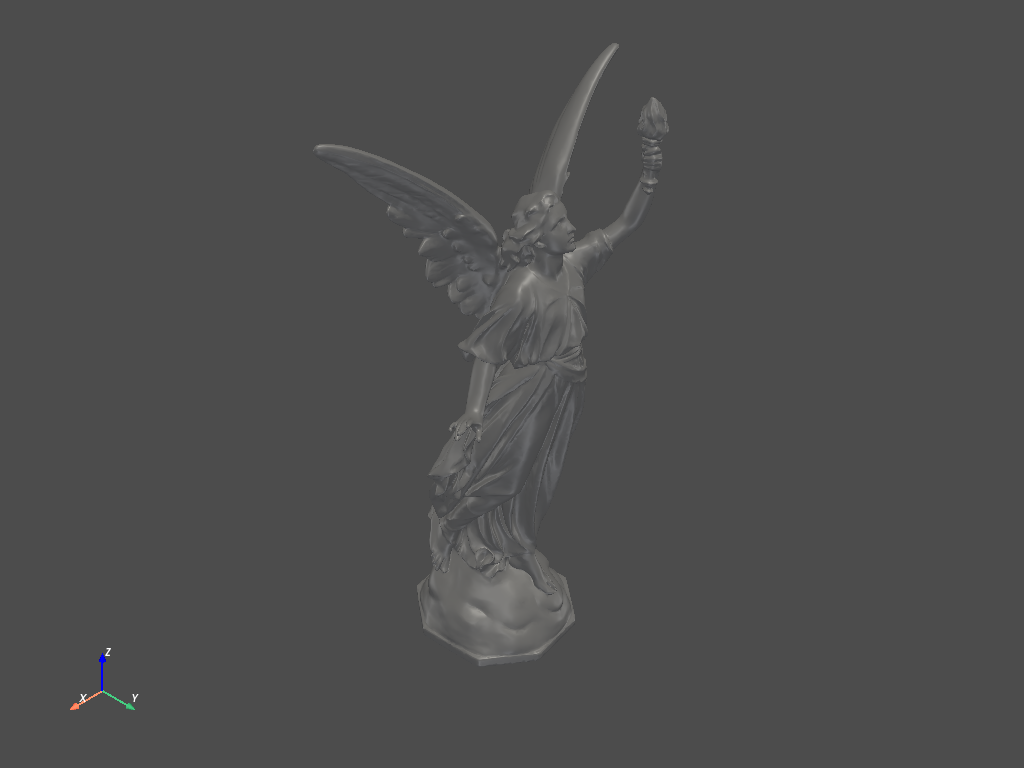

In [5]:
import pyvista as pv
from pyvista import examples

# download an example and display it using physically based rendering.
mesh = examples.download_lucy()
mesh.plot(color='lightgrey', pbr=True, metallic=0.2)

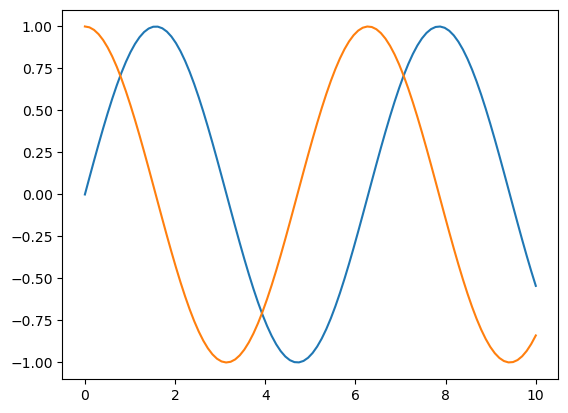

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

/Users/rasmus/opt/anaconda3/envs/67P_Swarm/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


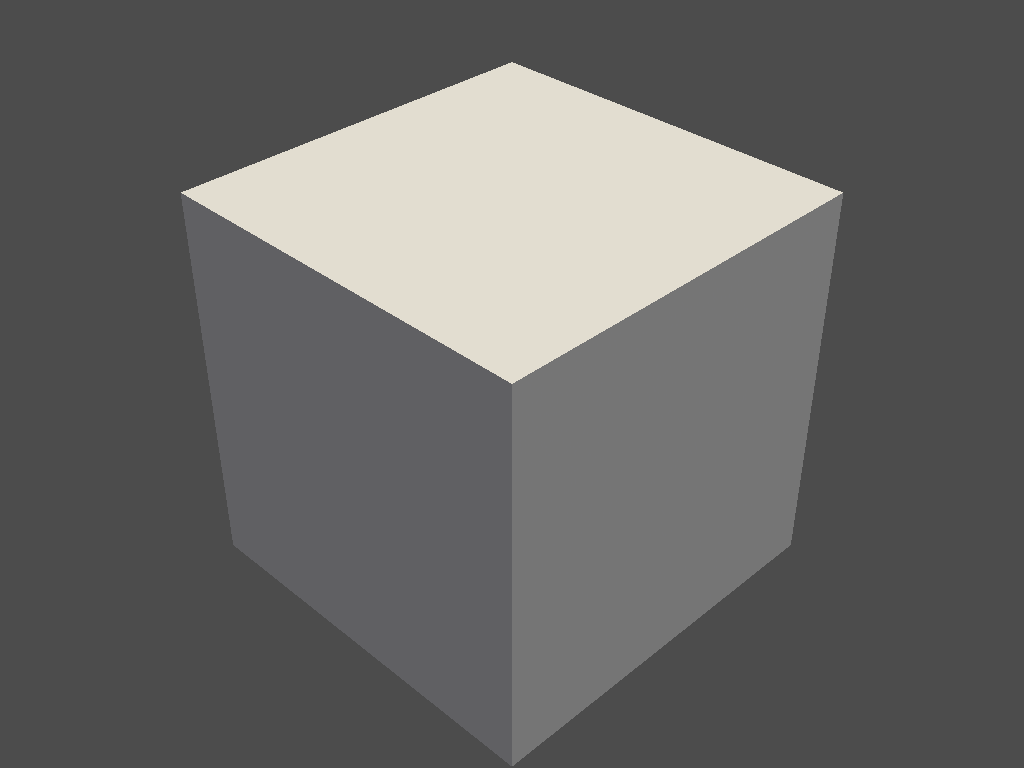

In [1]:
import pyvista as pv
pl = pv.Plotter()
_ = pl.add_mesh(pv.Cube())
pl.show()